In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

def get_VOCAB(corpus):
   # Getting Tokenize the news text
    corpus = corpus.apply(tokenizer.tokenize)

    # news information
    all_words = [word for tokens in corpus for word in tokens]
    sentence_lengths = [len(tokens) for tokens in corpus]

    VOCAB = sorted(list(set(all_words)))
    print("Data with StopWord :")
    print("- words total =", len(all_words))
    print("- vocabulary size =" , len(VOCAB))
    print("- Max sentence length =", max(sentence_lengths))
    print("- Min sentence length =", min(sentence_lengths))    

    return all_words, sentence_lengths,VOCAB

# Real Data

In [3]:
from sklearn.utils import shuffle
import pandas as pd 
real_df= pd.read_csv('/content/drive/MyDrive/Arabic_FakeNews/Model/Balance/Data/sub_real_news.csv',index_col=0)
real_df.shape

(6000, 5)

In [4]:
real_df.head(3)

,title,description,source,text,desc_length
91208,سوني تعرض أول إنسان آلي يركض,أعلنت شركة سوني العملاقة لصناعة الإكترونيات أن...,aljazeera.net,أعلنت شركة سوني اليابانية العملاقة لصناعة الإل...,41
108456,اعترافات فلين تورط صهر ترمب,قالت وسائل إعلام أميركية إن جاريد كوشنر صهر ال...,aljazeera.net,قالت وسائل إعلام أميركية إن جاريد كوشنر صهر ال...,30
35471,4 عناصر في منزلك تمثل بيئة خصبة لتجمع البكتيريا,قد يصاب الكثير من الأشخاص بالدهشة حين يتردد إل...,aljazeera.net,قد يصاب الكثير من الأشخاص بالدهشة حين يتردد إل...,27


In [5]:
real_description = real_df.description.loc[real_df.desc_length>=200].count()
real_description

0

In [6]:
real_description = real_df.description.loc[real_df.desc_length>=150].count()
real_description

0

In [7]:
real_description = real_df.description.loc[real_df.desc_length>=100].count()
real_description

0

In [8]:
real_description = real_df.description.loc[real_df.desc_length>=80].count()
real_description

0

### Title

In [9]:
all_words, sentence_lengths,VOCAB = get_VOCAB(real_df["title"])

Data with StopWord :
- words total = 46360
- vocabulary size = 14532
- Max sentence length = 22
- Min sentence length = 4


In [10]:
total_lens = 0
for sent in real_df['title']:
    total_lens+=len(sent.split())

print(total_lens/len(real_df['title']))

7.7026666666666666


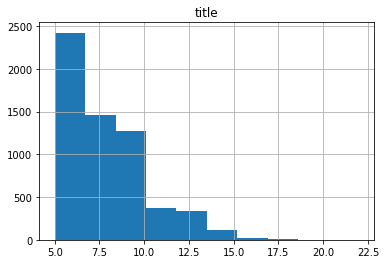

In [11]:
import matplotlib.pyplot as plt

real_count = []

for sent in real_df['title']:
    real_count.append(len(sent.split()))

length_df = pd.DataFrame({'title':real_count})

length_df.hist(bins = 10)
plt.show()

In [12]:
#Check how much % of title have 0-20 words
cnt=0
for i in real_df['title']:
    if(len(i.split())<=20):
        cnt=cnt+1


print(cnt/len(real_df['title']))

0.9998333333333334


### Description

In [13]:
all_words, sentence_lengths,VOCAB = get_VOCAB(real_df["description"])

Data with StopWord :
- words total = 168800
- vocabulary size = 31293
- Max sentence length = 79
- Min sentence length = 1


In [14]:
total_lens = 0
for sent in real_df['description']:
    total_lens+=len(sent.split())

print(total_lens/len(real_df['description']))

27.955833333333334


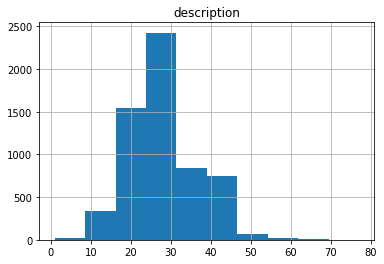

In [15]:
import matplotlib.pyplot as plt

real_count = []

for sent in real_df['description']:
    real_count.append(len(sent.split()))

length_df = pd.DataFrame({'description':real_count})

length_df.hist(bins = 10)
plt.show()

In [16]:
#Check how much % of title have 0-20 words
cnt=0
for i in real_df['description']:
    if(len(i.split())<=50):
        cnt=cnt+1


print(cnt/len(real_df['description']))

0.991


### Text

In [17]:
all_words, sentence_lengths,VOCAB = get_VOCAB(real_df["text"])

Data with StopWord :
- words total = 1871014
- vocabulary size = 124605
- Max sentence length = 5351
- Min sentence length = 21


In [18]:
total_lens = 0
for sent in real_df['text']:
    total_lens+=len(sent.split())

print(total_lens/len(real_df['text']))

310.02316666666667


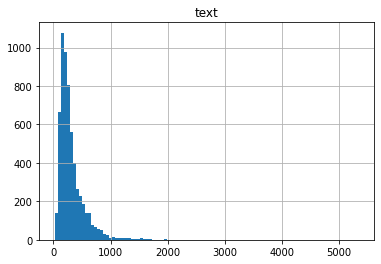

In [19]:
import matplotlib.pyplot as plt

real_count = []

for sent in real_df['text']:
    real_count.append(len(sent.split()))

length_df = pd.DataFrame({'text':real_count})

length_df.hist(bins = 100)
plt.show()

## labeled data

In [20]:
real_df['label']="real"
real_df.drop(columns=['title','description','desc_length'],axis=1,inplace=True)
real_df.rename(columns = {'text' : 'text'}, inplace = True)

real_df.head()

,source,text,label
91208,aljazeera.net,أعلنت شركة سوني اليابانية العملاقة لصناعة الإل...,real
108456,aljazeera.net,قالت وسائل إعلام أميركية إن جاريد كوشنر صهر ال...,real
35471,aljazeera.net,قد يصاب الكثير من الأشخاص بالدهشة حين يتردد إل...,real
42161,aljazeera.net,توصلت دراسة أميركية إلى أن تخفيف الوزن وخصوصا ...,real
57792,aljazeera.net,تراجعت هيئة سعودية عن مبادرة مثيرة تدعو إلى إن...,real


# Fake Data

In [21]:
fake_df = pd.read_excel("drive/My Drive/Arabic_FakeNews/Model/Corpora/main_fake_news.xlsx")
fake_df.drop(columns=['title','sub-title','category','has social link','claiming-type','link'],axis=1,inplace=True)
fake_df.head(4)

,claiming,fake-type,source
0,انتبهو يا جماعه وفهمو ولدكو\nعاجل وخطير . مخدر...,partially-fake,fatabyyano
1,بعد اعلان الرئيس الإيطالي تسليم الأمر إلى السم...,fake,fatabyyano
2,“هكذا حال الصين مع وباء الفايروس المنتشر مؤخرا”,fake,fatabyyano
3,حال المسلمين والمسلمات في الصين.. التعذيب على ...,fake,fatabyyano


In [22]:
fake_df['fake-type']='fake'

In [23]:
fake_df.shape

(2016, 3)

In [24]:
#rename columns
fake_df.rename(columns = {'claiming' : 'text', 'fake-type' : 'label'}, inplace = True)
fake_df.head(4)

,text,label,source
0,انتبهو يا جماعه وفهمو ولدكو\nعاجل وخطير . مخدر...,fake,fatabyyano
1,بعد اعلان الرئيس الإيطالي تسليم الأمر إلى السم...,fake,fatabyyano
2,“هكذا حال الصين مع وباء الفايروس المنتشر مؤخرا”,fake,fatabyyano
3,حال المسلمين والمسلمات في الصين.. التعذيب على ...,fake,fatabyyano


In [25]:
fake_df["text"].duplicated().sum()

3

In [26]:
fake_df.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates
fake_df.dropna(axis=0,inplace=True)   #dropping na
fake_df.shape

(2013, 3)

In [27]:
fake_df['description_length'] = fake_df.text.str.split().str.len()

In [28]:
children = fake_df.text.loc[fake_df.description_length >= 300]
children.count()

2

In [29]:
children = fake_df.text.loc[fake_df.description_length >= 250]
children.count()

4

In [30]:
children = fake_df.text.loc[fake_df.description_length >= 200]
children.count()

11

In [31]:
children = fake_df.text.loc[fake_df.description_length >= 150]
children.count()

41

In [32]:
children = fake_df.text.loc[fake_df.description_length >= 100]
children.count()

115

In [33]:
children = fake_df.text.loc[fake_df.description_length >= 80]
children.count()

175

In [34]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

def get_VOCAB(corpus):
   # Getting Tokenize the news text
    corpus = corpus.apply(tokenizer.tokenize)

    # news information
    all_words = [word for tokens in corpus for word in tokens]
    sentence_lengths = [len(tokens) for tokens in corpus]

    VOCAB = sorted(list(set(all_words)))
    print("Data with StopWord :")
    print("- words total =", len(all_words))
    print("- vocabulary size =" , len(VOCAB))
    print("- Max sentence length =", max(sentence_lengths))
    print("- min sentence length =", min(sentence_lengths))    
    
    return all_words, sentence_lengths,VOCAB

In [35]:
all_words, sentence_lengths,VOCAB = get_VOCAB(fake_df["text"])

Data with StopWord :
- words total = 66729
- vocabulary size = 21013
- Max sentence length = 339
- min sentence length = 3


In [36]:
total_lens = 0
for sent in fake_df['text']:
    total_lens+=len(sent.split())

print(total_lens/len(fake_df['text']))

33.49180327868852


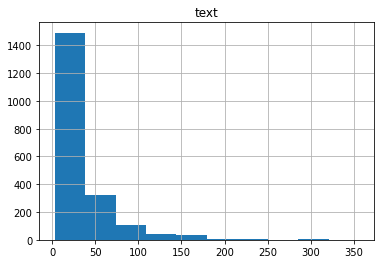

In [37]:
import matplotlib.pyplot as plt

real_count = []

for sent in fake_df['text']:
    real_count.append(len(sent.split()))

length_df = pd.DataFrame({'text':real_count})

length_df.hist(bins = 10)
plt.show()

In [38]:
#Check how much % of title have 0-20 words
cnt=0
for i in fake_df['text']:
    if(len(i.split())<=33 ):
        cnt=cnt+1


print(cnt/len(fake_df['text']))

0.7019374068554396


In [39]:
longest_text= 0
for sent in fake_df['text']:
    if len(sent.split()) > longest_text:
        longest_text = len(sent.split())

print(longest_text)

356


In [40]:
fake_df.drop(columns=['description_length'],axis=1,inplace=True)

# Combine Data

In [41]:
fake_df.shape,real_df.shape

((2013, 3), (6000, 3))

In [42]:
final_data = pd.concat([fake_df, real_df], axis=0)
final_data = shuffle(final_data) ## shuffle all the datapoints
final_data

,text,label,source
512376,Image caption تعتبر زيارة نتنياهو للقاهرة الثا...,real,bbc.com
364558,استهل فريق أخمات، من مدينة غروزني، مشواره في ا...,real,arabic.rt.com
15814,ثلاثة من رجال الشرطة قتلوا عندما فجر شخص دراجة...,real,aljazeera.net
543993,مصدر الصورة Reuters Image caption أظهرت النتائ...,real,bbc.com
54311,نيويورك تايمز: أوباما تحدث بلهجتين مختلفتين مع...,real,aljazeera.net
...,...,...,...
528888,جهازك لا يدعم تشغيل الفيديو\nأعلن المتحدث العس...,real,bbc.com
217877,من جديد يقدم المسرح الأكاديمي الروسي للشباب ال...,real,arabic.rt.com
1029,هذه هي الصورة الحقيقية لجميلة بوحيرد التي توف...,fake,misbar
471862,نشرت دبي مقطع فيديو يظهر فيه عزف للسلام الوطني...,real,arabic.rt.com


In [43]:
print(len(final_data))

8013


In [44]:
final_data["label"].value_counts()

real    6000
fake    2013
Name: label, dtype: int64

In [45]:
### convert real 1 and fake 0
final_data['label']=final_data['label'].apply(lambda x: 1 if x=='real' else 0 )
final_data

,text,label,source
512376,Image caption تعتبر زيارة نتنياهو للقاهرة الثا...,1,bbc.com
364558,استهل فريق أخمات، من مدينة غروزني، مشواره في ا...,1,arabic.rt.com
15814,ثلاثة من رجال الشرطة قتلوا عندما فجر شخص دراجة...,1,aljazeera.net
543993,مصدر الصورة Reuters Image caption أظهرت النتائ...,1,bbc.com
54311,نيويورك تايمز: أوباما تحدث بلهجتين مختلفتين مع...,1,aljazeera.net
...,...,...,...
528888,جهازك لا يدعم تشغيل الفيديو\nأعلن المتحدث العس...,1,bbc.com
217877,من جديد يقدم المسرح الأكاديمي الروسي للشباب ال...,1,arabic.rt.com
1029,هذه هي الصورة الحقيقية لجميلة بوحيرد التي توف...,0,misbar
471862,نشرت دبي مقطع فيديو يظهر فيه عزف للسلام الوطني...,1,arabic.rt.com


In [46]:
# Write final_data to new file
final_data.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataText/final_news.csv', index=False)
print("Done :) ")


Done :) 


In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(final_data["text"], final_data['label'], test_size=0.2, random_state=1)

train_df = pd.DataFrame({'text':x_train ,'label':y_train})

x_train, x_val, y_train, y_val = train_test_split(train_df["text"], train_df["label"], test_size=0.2, random_state=1)

train_df = pd.DataFrame({'text':x_train ,'label':y_train})
train_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataText/train_news.csv', index=False)


val_df=pd.DataFrame({'text':x_val ,'label':y_val})
val_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataText/val_news.csv', index=False)

test_df = pd.DataFrame({'text':x_test ,'label':y_test})
test_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataText/test_news.csv', index=False)



In [48]:
train_df.label.value_counts().sort_values()

0    1304
1    3824
Name: label, dtype: int64

In [49]:
val_df.label.value_counts().sort_values()

0    304
1    978
Name: label, dtype: int64

In [50]:
test_df.label.value_counts().sort_values()

0     405
1    1198
Name: label, dtype: int64

# arabert preprocess V02

In [51]:
!pip install -q transformers
!pip -q install farasapy
!git clone https://github.com/aub-mind/arabert
!pip -q install pyarabic

     |████████████████████████████████| 2.6 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 36.1 MB/s 
     |████████████████████████████████| 636 kB 46.1 MB/s 
     |████████████████████████████████| 3.3 MB 33.2 MB/s 
Cloning into 'arabert'...
remote: Enumerating objects: 544, done.
remote: Counting objects: 100% (330/330), done.
remote: Compressing objects: 100% (237/237), done.
remote: Total 544 (delta 175), reused 237 (delta 87), pack-reused 214
Receiving objects: 100% (544/544), 9.15 MiB | 24.40 MiB/s, done.
Resolving deltas: 100% (298/298), done.
     |████████████████████████████████| 126 kB 5.2 MB/s 


In [52]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from arabert.preprocess import ArabertPreprocessor

In [53]:
#Call Model
model_name="bert-base-arabertv02"
processor = ArabertPreprocessor(model_name=model_name)

In [54]:
train_df.text = train_df.text.apply(lambda x:   processor.preprocess(x))
train_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataText/PPV2train_news.csv', index=False)

val_df.text = val_df.text.apply(lambda x:   processor.preprocess(x))
val_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataText/PPV2val_news.csv', index=False)

test_df.text = test_df.text.apply(lambda x:   processor.preprocess(x))
test_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataText/PPV2test_news.csv', index=False)


In [55]:
train_df.label.value_counts().sort_values()

0    1304
1    3824
Name: label, dtype: int64

In [56]:
test_df.label.value_counts().sort_values()

0     405
1    1198
Name: label, dtype: int64

In [57]:
# final_data.text = final_data.text.apply(lambda x:   processor.preprocess(x))

In [58]:
# #Save Preprocess Data to new File
# final_data.to_csv('drive/My Drive/Arabic_FakeNews/Model/V0/Data/PPV2final_news.csv', index=False)
# print("Done :) ")

In [59]:
#Split Data After Preprocess


# x_train, x_test, y_train, y_test = train_test_split(final_data["text"], final_data['label'], test_size=0.2, random_state=1)

# train_df = pd.DataFrame({'text':x_train ,'label':y_train})
# train_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/V0/Data/PPV2train_news.csv', index=False)

# test_df = pd.DataFrame({'text':x_test ,'label':y_test})
# test_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/V0/Data/PPV2test_news.csv', index=False)
# print("Done :) ")